In [1]:
!pip install tradermade

In [91]:
import pandas as pd
import numpy as np
import tradermade as tm
tm.set_rest_api_key("-J95ZeapONnhR_h8Oc7g")
df = tm.timeseries(currency='EURUSD', start="2025-02-05-01:00",end="2025-02-21-08:00",interval="hourly",fields=["open", "high", "low","close"])
print(df)


                    date     open     high      low    close
0    2025-02-05 01:00:00  1.03785  1.03868  1.03724  1.03735
1    2025-02-05 02:00:00  1.03735  1.03855  1.03729  1.03848
2    2025-02-05 03:00:00  1.03846  1.03863  1.03792  1.03795
3    2025-02-05 04:00:00  1.03797  1.03826  1.03760  1.03789
4    2025-02-05 05:00:00  1.03788  1.03790  1.03733  1.03778
..                   ...      ...      ...      ...      ...
291  2025-02-21 04:00:00  1.05028  1.05051  1.04975  1.04994
292  2025-02-21 05:00:00  1.04991  1.05011  1.04915  1.04930
293  2025-02-21 06:00:00  1.04933  1.04943  1.04879  1.04887
294  2025-02-21 07:00:00  1.04894  1.05001  1.04894  1.04922
295  2025-02-21 08:00:00  1.04921  1.04944  1.04679  1.04767

[296 rows x 5 columns]


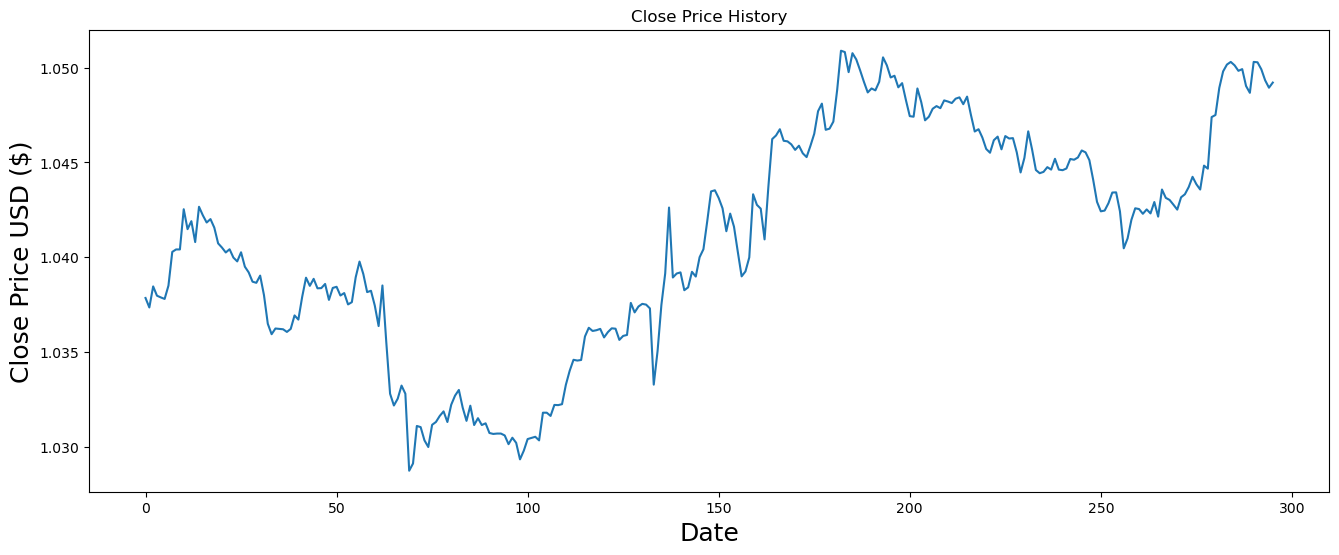

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [93]:
from sklearn.preprocessing import MinMaxScaler
close = df.filter(['open'])
dataset = close.values
training_data_len = int(np.ceil( len(dataset) * .90 ))
training_data_len


267

In [94]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.41128668],
       [0.38871332],
       [0.43882619],
       [0.41670429],
       [0.41264108],
       [0.40902935],
       [0.44063205],
       [0.52099323],
       [0.5268623 ],
       [0.5268623 ],
       [0.62257336],
       [0.5751693 ],
       [0.59413093],
       [0.54446953],
       [0.62844244],
       [0.60812641],
       [0.59097065],
       [0.59909707],
       [0.57878104],
       [0.54130926],
       [0.53137698],
       [0.51963883],
       [0.52731377],
       [0.50744921],
       [0.49841986],
       [0.52009029],
       [0.48577878],
       [0.47223476],
       [0.45011287],
       [0.44740406],
       [0.46455982],
       [0.41805869],
       [0.34988713],
       [0.32505643],
       [0.33860045],
       [0.33769752],
       [0.33679458],
       [0.33047404],
       [0.33769752],
       [0.36975169],
       [0.35981941],
       [0.41399549],
       [0.45959368],
       [0.44018059],
       [0.45688488],
       [0.43431151],
       [0.43476298],
       [0.444

In [95]:
time_step = 12
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(time_step, len(train_data)):
    x_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 11:
        print(x_train)
        print(y_train)
        print()

In [96]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(255, 12, 1)

In [97]:
test_data = scaled_data[training_data_len - time_step: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(time_step, len(test_data)):
    x_test.append(test_data[i-time_step:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [98]:
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError,MeanAbsolutePercentageError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.layers import *

SEED = 2018
os.environ['PYTHONHASHSEED'] = str(SEED)  # Python'un hash seed'i
random.seed(SEED)                         # Python random
np.random.seed(SEED)                      # NumPy
tf.random.set_seed(SEED)                  # TensorFlow

checkpoint = ModelCheckpoint(
    filepath='model_best.keras',   
    monitor='loss',        
    verbose=1,                     
    save_best_only=True,
    save_weights_only=False,         
    mode='min',                     
)


model = Sequential()
model.add(SimpleRNN(16, input_shape= (x_train.shape[1], 1), kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate = 0.001), loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size=1, epochs=300)

Epoch 1/300


C:\Users\alike\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0347
Epoch 2/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100
Epoch 3/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068
Epoch 4/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
Epoch 5/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043
Epoch 6/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037
Epoch 7/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033
Epoch 8/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030
Epoch 9/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027
Epoch 10/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025
Epoch 11/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024
Epoch 12/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023
Epoch 13/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022
Epoch 14/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021
Epoch 15/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 81/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 82/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 83/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 84/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 85/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 86/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 87/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 88/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 89/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 90/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 91/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 92/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 93/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 94/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 160/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 161/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 162/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 163/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 164/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 165/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 166/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 167/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 168/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 169/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 170/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 171/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 172/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 173/300
255/255 ━━━━━━━━━━━━

255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019
Epoch 238/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019
Epoch 239/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019
Epoch 240/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019
Epoch 241/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 242/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 243/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 244/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 245/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 246/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 247/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 248/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 249/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 250/300
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 251/300
255/255 ━━━━━━━━━━━━

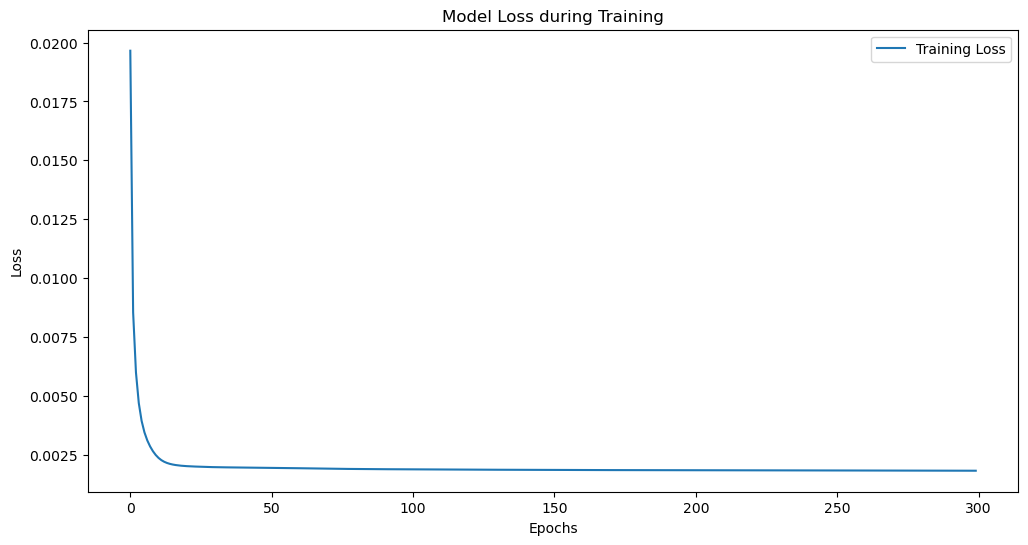

In [99]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [100]:
from tensorflow.keras.models import load_model
best_model = tf.keras.models.load_model('model_best.keras')

In [101]:
predictions = best_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


0.0008910620932614313

C:\Users\alike\AppData\Local\Temp\ipykernel_28144\4128429220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


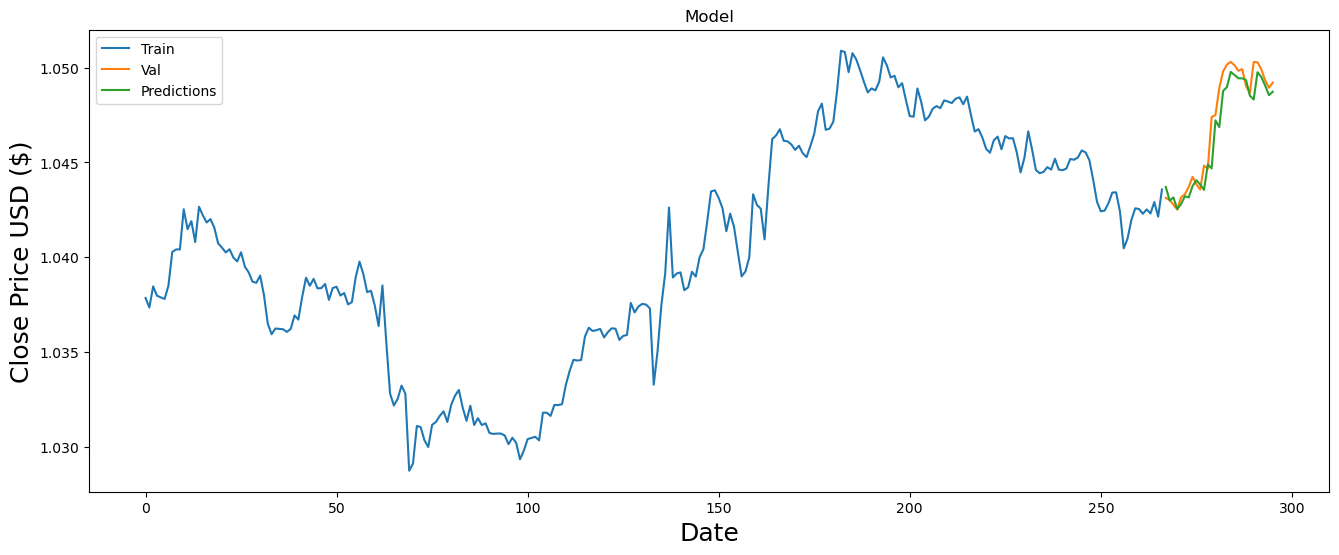

In [102]:
train = close[:training_data_len]
valid = close[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['open'])
plt.plot(valid[['open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [103]:
last_tm_hours = scaled_data[-time_step:,:]

In [104]:
print(last_tm_hours)

[[0.97336343]
 [0.96523702]
 [0.95214447]
 [0.95620767]
 [0.91602709]
 [0.89977427]
 [0.97336343]
 [0.9724605 ]
 [0.95575621]
 [0.92957111]
 [0.91196388]
 [0.9241535 ]]


In [105]:
last_tm_hours = np.array(last_tm_hours)
last_tm_hours = np.reshape(last_tm_hours, (1,last_tm_hours.shape[0], 1 ))
last_tm_hours.shape

(1, 12, 1)

In [106]:
tahminler = []
for i in range(time_step):
    prediction = best_model.predict(last_tm_hours)
    tahminler.append(prediction)
    last_tm_hours = np.delete(last_tm_hours,0)
    last_tm_hours = np.append(last_tm_hours,prediction)
    last_tm_hours = np.reshape(last_tm_hours, (1,last_tm_hours.shape[0], 1 ))
    print(last_tm_hours)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[[[0.96523702]
  [0.95214447]
  [0.95620767]
  [0.91602709]
  [0.89977427]
  [0.97336343]
  [0.9724605 ]
  [0.95575621]
  [0.92957111]
  [0.91196388]
  [0.9241535 ]
  [0.9028222 ]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[[0.95214447]
  [0.95620767]
  [0.91602709]
  [0.89977427]
  [0.97336343]
  [0.9724605 ]
  [0.95575621]
  [0.92957111]
  [0.91196388]
  [0.9241535 ]
  [0.9028222 ]
  [0.87444603]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[[0.95620767]
  [0.91602709]
  [0.89977427]
  [0.97336343]
  [0.9724605 ]
  [0.95575621]
  [0.92957111]
  [0.91196388]
  [0.9241535 ]
  [0.9028222 ]
  [0.87444603]
  [0.85362875]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[[0.91602709]
  [0.89977427]
  [0.97336343]
  [0.9724605 ]
  [0.95575621]
  [0.92957111]
  [0.91196388]
  [0.9241535 ]
  [0.9028222 ]
  [0.87444603]
  [0.85362875]
  [0.83215135]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[[0.89977427]
  [0.97336343]
  [0.9724605 ]
  [0.95575621]
  [0.92957111]
  [0.9

In [107]:
print(tahminler)

[array([[0.9028222]], dtype=float32), array([[0.87444603]], dtype=float32), array([[0.85362875]], dtype=float32), array([[0.83215135]], dtype=float32), array([[0.8227514]], dtype=float32), array([[0.81102824]], dtype=float32), array([[0.7940412]], dtype=float32), array([[0.7803875]], dtype=float32), array([[0.7653137]], dtype=float32), array([[0.7543378]], dtype=float32), array([[0.74539983]], dtype=float32), array([[0.73362803]], dtype=float32)]


In [108]:
tahminler = np.array(tahminler)

In [109]:
tahminler = np.reshape(tahminler,(time_step,1))
tahminler.shape

(12, 1)

In [110]:
print(tahminler)

[[0.9028222 ]
 [0.87444603]
 [0.85362875]
 [0.83215135]
 [0.8227514 ]
 [0.81102824]
 [0.7940412 ]
 [0.7803875 ]
 [0.7653137 ]
 [0.7543378 ]
 [0.74539983]
 [0.73362803]]


In [111]:
tahminler = scaler.inverse_transform(tahminler)
print(tahminler)

[[1.0487375]
 [1.048109 ]
 [1.047648 ]
 [1.0471721]
 [1.0469639]
 [1.0467043]
 [1.0463281]
 [1.0460256]
 [1.0456917]
 [1.0454485]
 [1.0452507]
 [1.0449898]]


In [112]:
dataset.shape

(296, 1)

In [113]:
dataset_indices = np.arange(len(dataset)-time_step)
tahminler_indices = np.arange(len(dataset)-time_step, len(dataset) + len(tahminler)-time_step+1)

In [114]:
all_data = []
for i in range(time_step, len(scaled_data)):
    all_data.append(scaled_data[i-time_step:i, 0])
all_data = np.array(all_data)
all_data = np.reshape(all_data, (all_data.shape[0], all_data.shape[1], 1 ))
all_data.shape

(284, 12, 1)

In [115]:
tum_prediction = best_model.predict(all_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [116]:
tum_prediction = scaler.inverse_transform(tum_prediction)
tum_prediction.shape

(284, 1)

In [117]:
print(tum_prediction[-1])

[1.0487256]


In [118]:
tahminler = np.append(tum_prediction[-1],tahminler)
print(tahminler)
tahminler = np.reshape(tahminler,(time_step+1,1))

[1.0487256 1.0487375 1.048109  1.047648  1.0471721 1.0469639 1.0467043
 1.0463281 1.0460256 1.0456917 1.0454485 1.0452507 1.0449898]


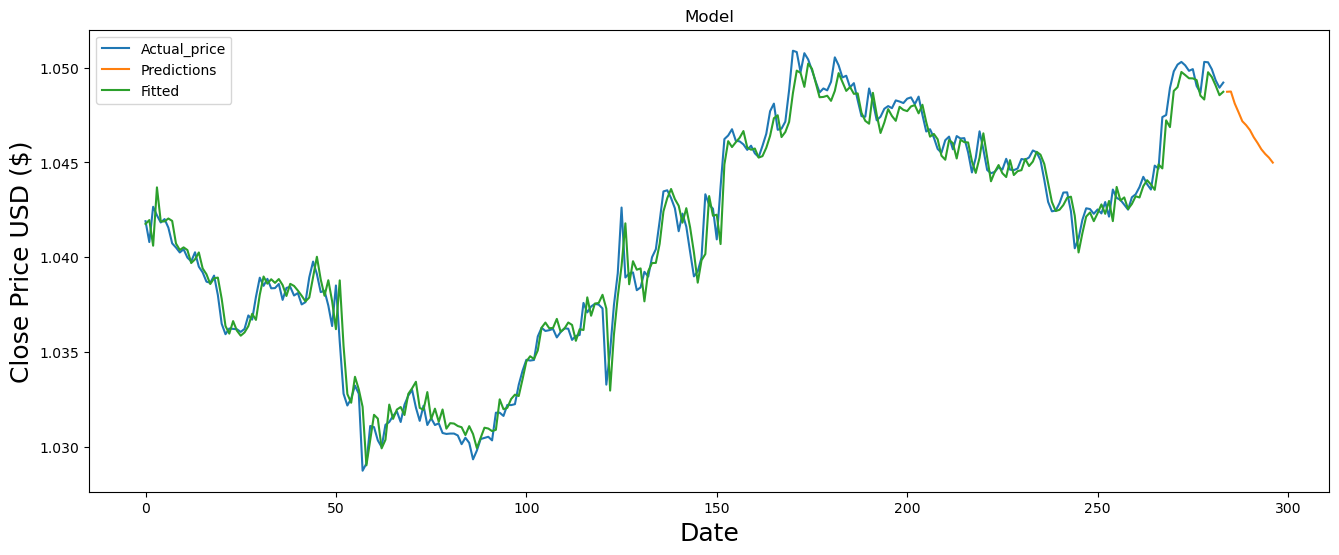

In [119]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(dataset_indices,dataset[time_step:])
plt.plot(tahminler_indices,tahminler)
plt.plot(tum_prediction)
plt.legend(['Actual_price', 'Predictions', 'Fitted'], loc='upper left')
plt.show()